<a href="https://colab.research.google.com/github/Sasso28/Baby-Steps/blob/main/RegLin_vs_Logit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    SAT  Admitted
0  1363         0
1  1792         1
2  1954         1
3  1653         0
4  1593         0


Text(0.5, 0, 'Admitted')

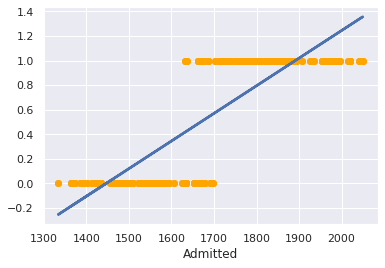

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

#particular line in order to fix the problems of scipy, otherwise there will be no summary for the logistic regression
stats.chisqprob = lambda chisq, df : stats.chi2.sf(chisq,df)
sns.set()

raw_data = pd.read_csv(r'/content/drive/MyDrive/2.01. Admittance.csv')

raw_data["Admitted"] = raw_data["Admitted"].map({"Yes" : 1, "No" : 0})
print(raw_data.head())

x1 = raw_data["SAT"]
y = raw_data["Admitted"]

plt.scatter(x1, y, color = 'orange')
plt.xlabel("SAT")
plt.xlabel("Admitted")
#plt.show()

x = sm.add_constant(x1)
reg_lin = sm.OLS(y, x)
results_lin = reg_lin.fit()

plt.scatter(x1, y, color = 'orange')
y_hat = x1*results_lin.params[1] + results_lin.params[0]

plt.plot(x1, y_hat, lw=2.5)
plt.xlabel("SAT")
plt.xlabel("Admitted")
#plt.show()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Tue, 12 Jan 2021   Pseudo R-squ.:                  0.7992
Time:                        13:48:47   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

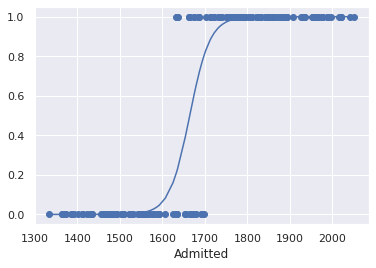

In [3]:


reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

def f(x, b0, b1):
   return np.array(np.exp(b0+b1*x) / (1+ np.exp(b0+b1*x)))

f_sorted = np.sort(f(x1, results_log.params[0], results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y)
plt.xlabel("SAT")
plt.xlabel("Admitted")
plt.plot(x_sorted, f_sorted)
#plt.show()

results_log.summary()